In [7]:
import numpy as np
import csv
import pandas as pd
import time 
import fluidlab as fl

In [8]:
#(r"D:\Ammonia_NBL_3D\NBL_3D_T_F100_600_Hot_Buoyant.csv",skiprows = sk,nrows = n, dtype =np.float32,header = None)
#(r"D:\Helium_FLUX_1\He_h01_01_T.csv",skiprows = sk,nrows = n, dtype =np.float32)

In [39]:
Start = 150 # numer of rows in dataset
End = 500 # time start

sk = Start*45*45*700
nr = End - Start
n = 45*45*700*nr
name = 'Helium_FLUX_1'
# #INPUT the path of the file
ome = pd.read_csv(r"T:\Documents\MATLAB\Helium_FLUX_1_omega.csv",skiprows = sk,nrows = n, dtype =np.float32,header = None)
omega = ome.to_numpy()
del ome
omega = np.reshape(omega, (45,45,700,nr), order="F")


dx = dy =40
dz = 10
nx, ny, nz, nt = fl.shape(omega)

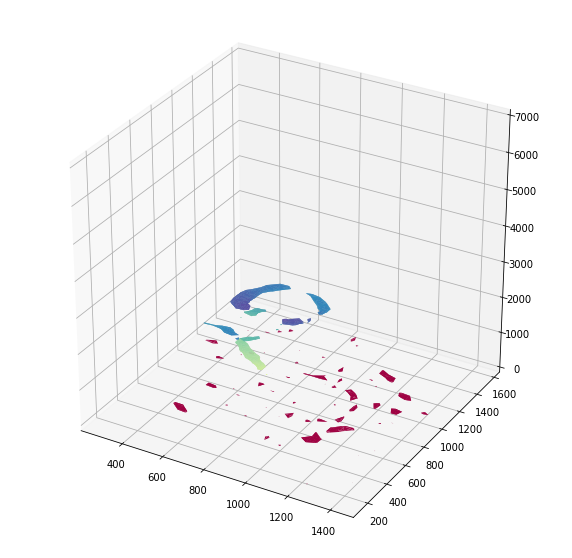

In [82]:
import numpy as np
from numpy import cos, pi
from skimage.measure import marching_cubes_lewiner
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t = 100

# x, y, z = pi*np.mgrid[0:dx:nx,0:dy:ny, 0:dz:nz]
# x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = omega[:,:,:,t]
verts, faces, _, _ = marching_cubes_lewiner(vol, 0.52, spacing=(dx, dy, dz))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# ax.set_ylim(-850,850)
# ax.set_xlim(-850,850)
ax.set_zlim(0,7000)
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='Spectral',
                lw=1)
plt.show()

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces = measure.marching_cubes(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.show()

AttributeError: module 'skimage.measure' has no attribute 'marching_cubes'

In [2]:
name = 'Helium'
typedata = 'Omega'

# #Plumehalf graph
# #Estimated time: ~1 minutes
# #Input (u,v,w,threshold,dx,dy,dz,D,graphname)
# tic = time.perf_counter()
# threshold = 1/np.exp(1)
# fl.plumehalfgraph(dataw,datat,threshold,40,40,10,400,name)

# toc1 = time.perf_counter()
# print(f"Eigen: {toc1 - tic:0.4f} seconds") 

# #Top_view_graph
# #Estimated time: ~1 minutes
# #Input (data(w or t),type_data,file_namedx,dx,dy,dz,D,frame) * more frame will take longer
# tic = time.perf_counter()
# fl.topviewmap(dataw,datatype = "W/Wc",filename = name,dx=45,dy=45,dz=10,D=400,frame=20)
# toc1 = time.perf_counter()
# print(f"Eigen: {toc1 - tic:0.4f} seconds") 
